## Turning Point Test and pattern recognition
https://docs.scipy.org/doc/scipy/reference/signal.html

1. Peak Finding  <br>
... argrelmin   <br>
... argrelmax <br>
... argrelextrema <br>
... find_peaks <br>
... find_peaks_cwt <br>
2. Pattern recognition

In [1]:
import pandas as pd
import numpy as np
import talib as ta
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import talib as ta
from scipy.signal import argrelmin, argrelmax, argrelextrema, find_peaks_cwt

In [27]:
diretorio=os.getcwd()
print(diretorio)
df=pd.read_csv(diretorio+"/"+"petr4.csv",sep=",",index_col="Data")   #
df.tail(2)

/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python


,volume,close,open,low,high
Data,,,,,
2018-10-02,2.840932e+09,22.82,22.00,21.90,22.82
2018-10-03,3.645505e+09,23.79,25.25,23.46,25.42


## functions

In [82]:
# draw graphs
def tsb(data,n_period=120):
    data2=data[-n_period:]
    plt.style.use('fivethirtyeight')
    fig=plt.figure(figsize=(18,5))
    top = plt.subplot2grid((9,1), (0, 0), rowspan=9)
    x_axis = data2.index.get_level_values(0)
    ema1,=top.plot(x_axis, data2['close'],color='black', lw=2)
    top.axes.get_xaxis().set_visible(False)
    # signals turning points
    v_pr=data2.loc[~np.isnan(data2['arg_max1'])]
    c_pr=data2.loc[~np.isnan(data2['arg_min1'])]
    top.plot(v_pr.index, data2.loc[v_pr.index]['close'], 'v', markersize=10, color='r')
    top.plot(c_pr.index, data2.loc[c_pr.index]['close'], '^', markersize=10, color='b')
    for dates in [0,int(n_period/2),int(n_period*.90)]:
        top.axvline(x=x_axis[dates],color='blue', linestyle='--',linewidth=1)
        top.text(x_axis[dates],data2['close'].min()*0.85,x_axis[dates])
    return plt.show()

## 1. Peak Finding

In [83]:
def tp(data,column='close'):
    ## argrelmin
    data['arg_min1'] = data.iloc[argrelmin(data[column].values,order=1)[0]]['close']
    data['arg_min3'] = data.iloc[argrelmin(data[column].values,order=3)[0]]['close']
    ## argrelmax
    data['arg_max1'] = data.iloc[argrelmax(data[column].values,order=1)[0]]['close']
    data['arg_max3'] = data.iloc[argrelmax(data[column].values,order=3)[0]]['close']
    return data

In [84]:
df=tp(df)

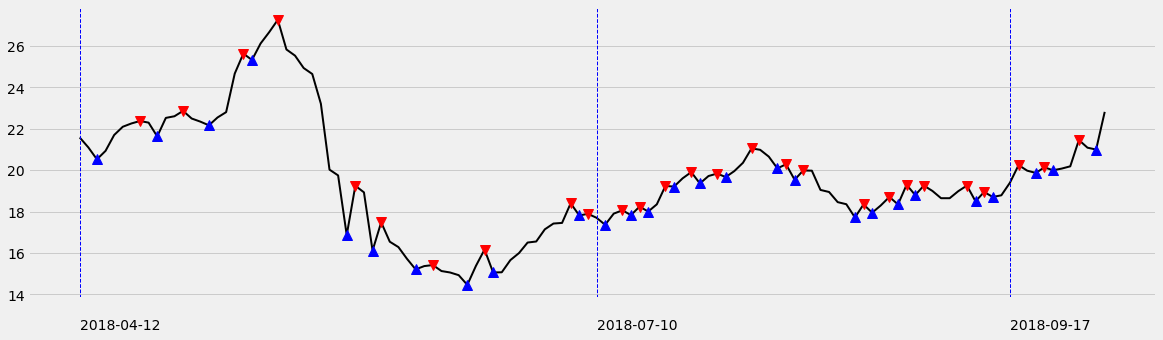

In [85]:
tsb(df)

## 2. Pattern Recognition

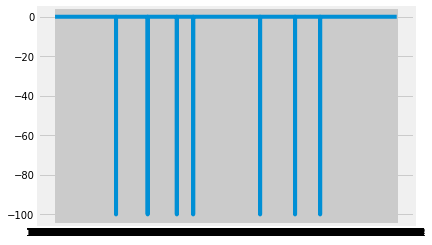

In [91]:
c1 = ta.CDL2CROWS(df.open, df.high, df.low, df.close)
plt.plot(c1)

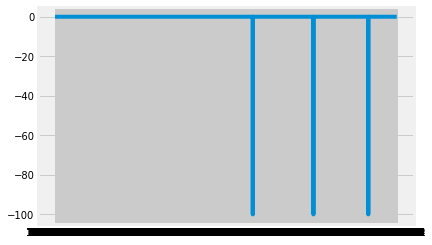

In [93]:
c2 = ta.CDL3BLACKCROWS(df.open, df.high, df.low, df.close)
plt.plot(c2)

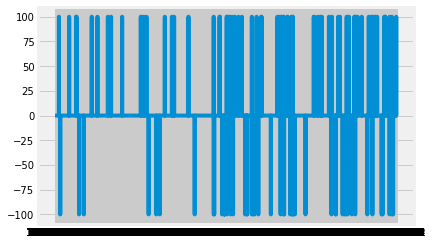

In [94]:
c3 = ta.CDL3INSIDE(df.open, df.high, df.low, df.close)
plt.plot(c3)

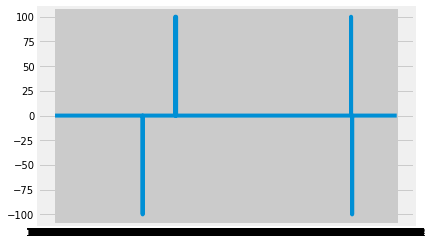

In [95]:
c4 = ta.CDL3LINESTRIKE(df.open, df.high, df.low, df.close)
plt.plot(c4)

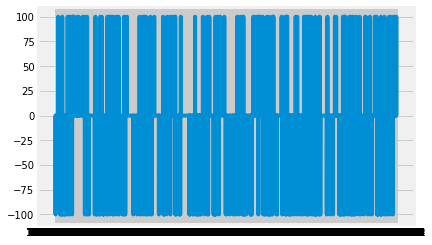

In [96]:
c5 = ta.CDL3OUTSIDE(df.open, df.high, df.low, df.close)
plt.plot(c5)

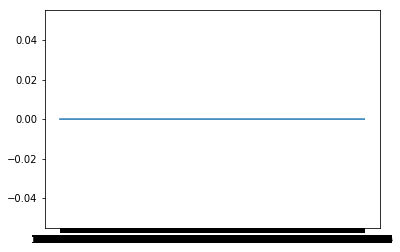

In [4]:
c6 = ta.CDL3STARSINSOUTH(df.open, df.high, df.low, df.close)
plt.plot(c6)

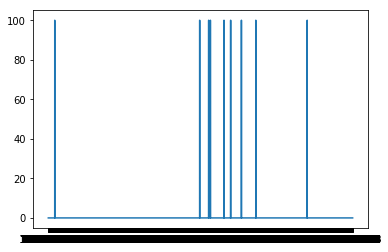

In [5]:
c7 = ta.CDL3WHITESOLDIERS(df.open, df.high, df.low, df.close)
plt.plot(c7)

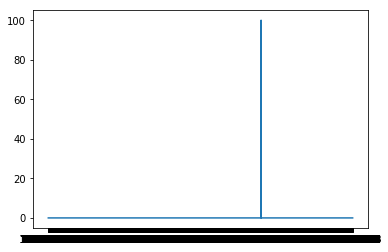

In [6]:
c8 = ta.CDLABANDONEDBABY(df.open, df.high, df.low, df.close, penetration=0)
plt.plot(c8)

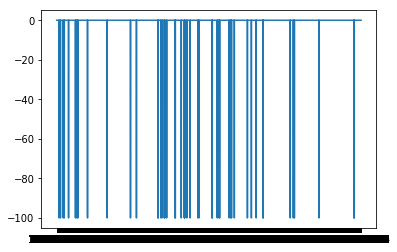

In [7]:
c9 = ta.CDLADVANCEBLOCK(df.open, df.high, df.low, df.close)
plt.plot(c9)

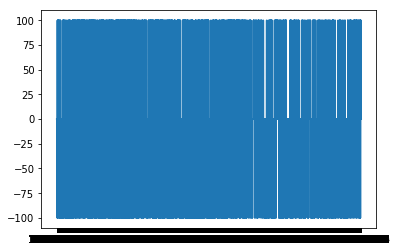

In [17]:
c10 = ta.CDLBELTHOLD(df.open, df.high, df.low, df.close)
plt.plot(c10)

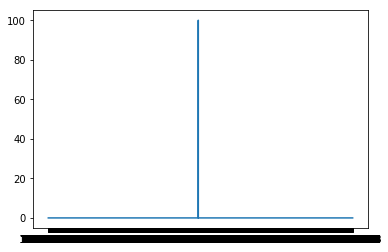

In [19]:
c11 = ta.CDLBREAKAWAY(df.open, df.high, df.low, df.close)
plt.plot(c11)

In [21]:
def candle(df):
    df['c1'] = ta.CDL2CROWS(df.open, df.high, df.low, df.close)
    df['c2'] = ta.CDL3BLACKCROWS(df.open, df.high, df.low, df.close)
    df['c3'] = ta.CDL3INSIDE(df.open, df.high, df.low, df.close)
    df['c4'] = ta.CDL3LINESTRIKE(df.open, df.high, df.low, df.close)
    df['c5'] = ta.CDL3OUTSIDE(df.open, df.high, df.low, df.close)
    df['c6'] = ta.CDL3STARSINSOUTH(df.open, df.high, df.low, df.close)
    df['c7'] = ta.CDL3WHITESOLDIERS(df.open, df.high, df.low, df.close)
    df['c8'] = ta.CDLABANDONEDBABY(df.open, df.high, df.low, df.close, penetration=0)
    df['c9'] = ta.CDLADVANCEBLOCK(df.open, df.high, df.low, df.close)
    df['c10'] = ta.CDLBELTHOLD(df.open, df.high, df.low, df.close)
    df['c11'] = ta.CDLBREAKAWAY(df.open, df.high, df.low, df.close)
    return df

In [22]:
# y variable
from sklearn.preprocessing import StandardScaler, QuantileTransformer
scaler2=QuantileTransformer(output_distribution='uniform')
def var_y(df,train=0.8):
    df["y"]=np.where(df["close"].shift(-1)>df["close"],1,-1)
    x=df.iloc[:,:-1]
    y=pd.DataFrame(df.iloc[:,-1])
    # train and test
    split = int(len(df)*train)
    x_train, x_test, y_train, y_test = x[:split],x[split:],y[:split],y[split:]
    # scaling
    x_train=scaler2.fit_transform(x_train)
    x_test=scaler2.fit_transform(x_test)
    return df,x,y, x_train, x_test, y_train, y_test

In [28]:
df=candle(df)
petr4,x_petr4,y_petr4, x_train_petr4, x_test_petr4, y_train_petr4, y_test_petr4=var_y(df)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier1=Sequential()
classifier1.add(Dense(units=512,kernel_initializer="uniform",activation="sigmoid",input_dim=x_petr4.shape[1]))
classifier1.add(Dense(units=256,kernel_initializer="uniform",activation="sigmoid"))
classifier1.add(Dense(units=128,kernel_initializer="uniform",activation="sigmoid"))
classifier1.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))   #output layer
classifier1.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])
m1=classifier1.fit(x_train_petr4,y_train_petr4,batch_size=80,epochs=200,verbose=2)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/200
 - 1s - loss: 1.0099 - acc: 0.0132
Epoch 2/200
 - 0s - loss: 0.9971 - acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 0.9971 - acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 0.9975 - acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 12/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 13/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 14/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 15/200
 - 0s - loss: 0.9971 - acc: 0.0000e+00
Epoch 16/200
 - 0s - loss: 0.9971 - acc: 0.0000e+00
Epoch 17/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 18/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 19/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 20/200
 - 0s - loss

Epoch 158/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 159/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 160/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 161/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 162/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 163/200
 - 0s - loss: 0.9976 - acc: 0.0000e+00
Epoch 164/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 165/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 166/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 167/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 168/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 169/200
 - 0s - loss: 0.9973 - acc: 0.0000e+00
Epoch 170/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 171/200
 - 0s - loss: 0.9972 - acc: 0.0000e+00
Epoch 172/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 173/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 174/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 175/200
 - 0s - loss: 0.9974 - acc: 0.0000e+00
Epoch 176/200
 - 0s - loss: 0.9974 - acc: 0.00

In [34]:
def forecasting(df,x_test,prob=0.6,classifier_name="classifier"):
    df=df[-x_test.shape[0]:]
    df["y_pred"]=classifier_name.predict(x_test)
    df["y_pred2"]=df["y_pred"]>prob
    #
    df["tomorrow_ret"]=0
    df["tomorrow_ret"]=np.log(df['close']/df["close"].shift(1))
    df["tomorrow_ret"]=df["tomorrow_ret"].shift(-1)
    #
    # 1. escolhemos os resultados == True e sem short
    df["strategy_ret"]=0.
    df["strategy_ret"]=np.where(df["y_pred2"]==True,df["tomorrow_ret"],0)
    # 2. escolhemos as P(y_pred)>x e com short
    df["strategy_ret2"]=0.
    df["strategy_ret2"]=np.where(df["y_pred"]>prob,df["tomorrow_ret"],-df["tomorrow_ret"])
    return df

In [35]:
petr4f=forecasting(petr4,x_test_petr4,0.65,classifier1)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [40]:
petr4f.tail(5)

,volume,close,open,low,high,c1,c2,c3,c4,c5,...,c8,c9,c10,c11,y,y_pred,y_pred2,tomorrow_ret,strategy_ret,strategy_ret2
Data,,,,,,,,,,,,,,,,,,,,,
2018-09-27,2.178390e+09,21.46,20.50,20.47,21.46,0,0,0,0,0,...,0,0,100,0,-1,0.054001,False,-0.017392,0.0,0.017392
2018-09-28,1.952947e+09,21.09,21.13,21.02,21.94,0,0,0,0,0,...,0,0,0,0,-1,0.054001,False,-0.004277,0.0,0.004277
2018-10-01,1.182549e+09,21.00,21.25,20.80,21.36,0,0,0,0,0,...,0,0,0,0,1,0.054001,False,0.083115,0.0,-0.083115
2018-10-02,2.840932e+09,22.82,22.00,21.90,22.82,0,0,0,0,0,...,0,0,0,0,1,0.054001,False,0.041628,0.0,-0.041628
2018-10-03,3.645505e+09,23.79,25.25,23.46,25.42,0,0,0,0,0,...,0,0,0,0,-1,0.054001,False,NaN,0.0,NaN


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
def roc_curva(df):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(2):   #duas classes
        fpr[i],tpr[i],__= roc_curve(df["y"],df['y_pred'])
        roc_auc[i] = auc(fpr[i],tpr[i])   #calcula a area
    #
    fpr["micro"],tpr["micro"], _ = roc_curve(df["y"],df['y_pred'])
    roc_auc["micro"] = auc(fpr["micro"],tpr["micro"])    
    print("ROC area: ",roc_auc_score(df["y"],df['y_pred']))
    plt.plot(fpr[1],tpr[1],color="darkorange",lw=2,label="ROC area= %0.3f" % roc_auc[1])
    plt.plot([0,1],[0,1],color="navy",lw=1,linestyle="--")
    plt.legend(loc="best")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    return plt.show()

ROC area:  0.5100319648570631


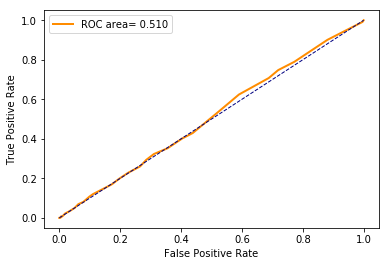

In [37]:
roc_curva(petr4f)

In [38]:
def retornos(df,n_dias=100):
    df=df[-n_dias+1:]
    df["cum_market_ret"]=np.cumsum(df["tomorrow_ret"])
    df["cum_long_ret"]=np.cumsum(df["strategy_ret"])
    df["cum_long_short_ret"]=np.cumsum(df["strategy_ret2"])
    ##
    print("Retorno dos últimos ",n_dias,"  dias")
    A=df["cum_market_ret"][-2]*100
    print("Market Return Cumulative em %",A)
    B=df["cum_long_ret"][-2]*100
    print("Strategy Long Cumulative em %",B)
    C=df["cum_long_short_ret"][-2]*100
    print("Strategy Long_short Cumulative em %",C)
    print("--------------------------")
    plt.figure(figsize=(10,5))
    plt.plot(df["cum_market_ret"],color="r",label="Market Return:   %.2f" %A)
    plt.plot(df["cum_long_ret"],color="b",label="Long Return:  %.2f" %B)
    plt.plot(df["cum_long_short_ret"],color="orange",label="Long_short Return  %.2f" %C,lw=2,linestyle="--")
    plt.legend(loc="best")
    return plt.show()

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Retorno dos últimos  100   dias
Market Return Cumulative em % -11.426722907913742
Strategy Long Cumulative em % 0.0
Strategy Long_short Cumulative em % 11.426722907913742
--------------------------


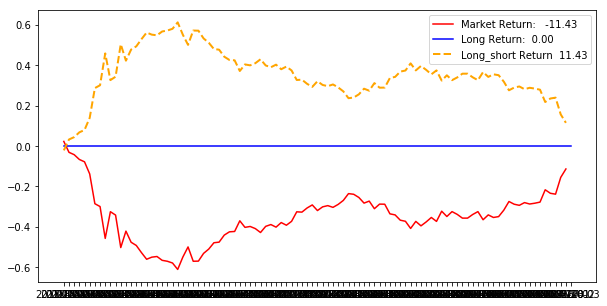

In [39]:
retornos(petr4f)